In [16]:
import polars as pl
from pathlib import Path
import seaborn as sns
import os
import matplotlib.pyplot as plt
from setup.constants import PROJECT_ROOT, PROJECT_DATA

In [2]:
iris_df = pl.read_csv(PROJECT_DATA)

In [3]:
print(f"Shape of the dataset: {iris_df.shape}")
print(iris_df.head(5))
print(iris_df.describe())

Shape of the dataset: (150, 5)
shape: (5, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬─────────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ class       │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---         │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str         │
╞══════════════╪═════════════╪══════════════╪═════════════╪═════════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ Iris-setosa │
│ 4.9          ┆ 3.0         ┆ 1.4          ┆ 0.2         ┆ Iris-setosa │
│ 4.7          ┆ 3.2         ┆ 1.3          ┆ 0.2         ┆ Iris-setosa │
│ 4.6          ┆ 3.1         ┆ 1.5          ┆ 0.2         ┆ Iris-setosa │
│ 5.0          ┆ 3.6         ┆ 1.4          ┆ 0.2         ┆ Iris-setosa │
└──────────────┴─────────────┴──────────────┴─────────────┴─────────────┘
shape: (9, 6)
┌────────────┬──────────────┬─────────────┬──────────────┬─────────────┬────────────────┐
│ statistic  ┆ sepal_length ┆ sepal_w

In [4]:
print(iris_df.group_by("class").agg(pl.col("sepal_width").len().alias("# samples")))

shape: (3, 2)
┌─────────────────┬───────────┐
│ class           ┆ # samples │
│ ---             ┆ ---       │
│ str             ┆ u32       │
╞═════════════════╪═══════════╡
│ Iris-versicolor ┆ 50        │
│ Iris-virginica  ┆ 50        │
│ Iris-setosa     ┆ 50        │
└─────────────────┴───────────┘


In [5]:
print(
    iris_df.group_by("class").agg(
        pl.col(pl.Float64).mean().name.prefix("avg_"),
    )
)

shape: (3, 5)
┌─────────────────┬──────────────────┬─────────────────┬──────────────────┬─────────────────┐
│ class           ┆ avg_sepal_length ┆ avg_sepal_width ┆ avg_petal_length ┆ avg_petal_width │
│ ---             ┆ ---              ┆ ---             ┆ ---              ┆ ---             │
│ str             ┆ f64              ┆ f64             ┆ f64              ┆ f64             │
╞═════════════════╪══════════════════╪═════════════════╪══════════════════╪═════════════════╡
│ Iris-virginica  ┆ 6.588            ┆ 2.974           ┆ 5.552            ┆ 2.026           │
│ Iris-versicolor ┆ 5.936            ┆ 2.77            ┆ 4.26             ┆ 1.326           │
│ Iris-setosa     ┆ 5.006            ┆ 3.418           ┆ 1.464            ┆ 0.244           │
└─────────────────┴──────────────────┴─────────────────┴──────────────────┴─────────────────┘


In [19]:
sns.set_theme(context="notebook", style="darkgrid")
colors = {"Iris-setosa": "r", "Iris-virginica": "g", "Iris-versicolor": "b"}


def make_scatter_plots(
    df: pl.DataFrame, x: str, y: str, filename: Path, col: str = "class", palette: dict = colors
) -> None:
    img = sns.relplot(data=df, col=col, x=x, y=y, style=col, hue=col, palette=palette)
    img.savefig(filename)



def make_histograms(
    df: pl.DataFrame, x: str, filename: Path, col: str = "class", palette: dict = colors
) -> None:
    plt.figure()
    sns.histplot(
        data=df, x=x, hue=col, palette=palette, element="step", multiple="dodge"
    )
    plt.savefig(filename)
    plt.show()
    plt.close()

if not os.path.isdir(PROJECT_ROOT / 'figures'):
    os.mkdir(PROJECT_ROOT / 'figures')

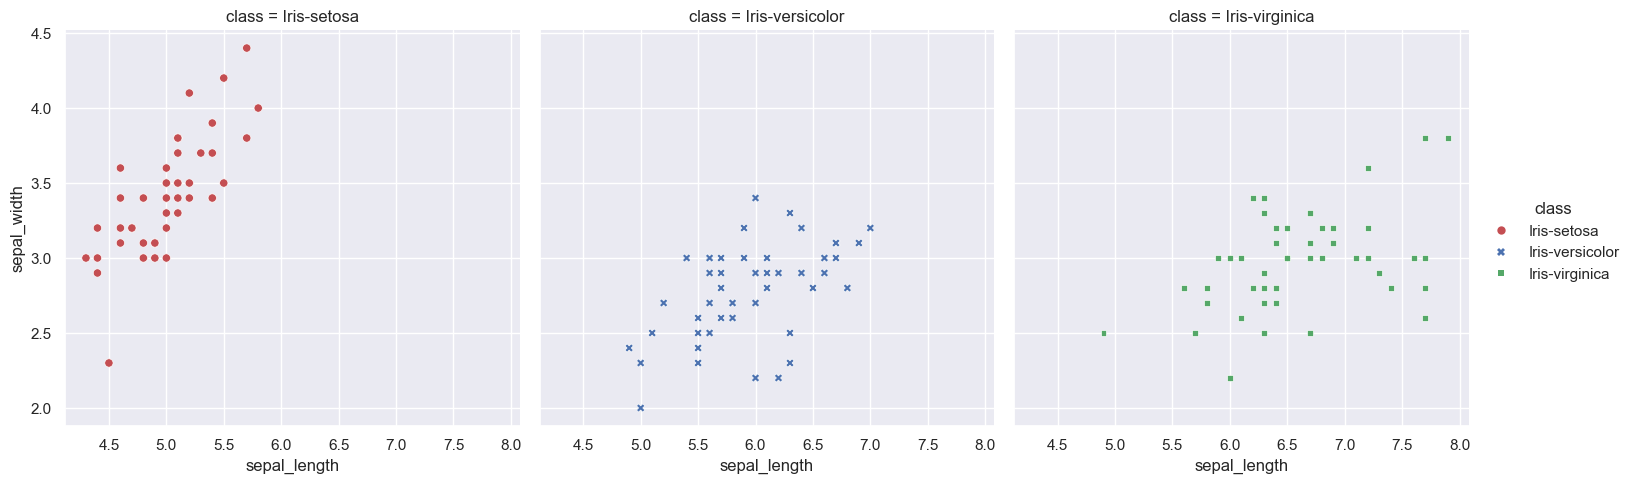

In [12]:
make_scatter_plots(df=iris_df, x="sepal_length", y="sepal_width", filename=PROJECT_ROOT / "figures/scatter_sepal" )

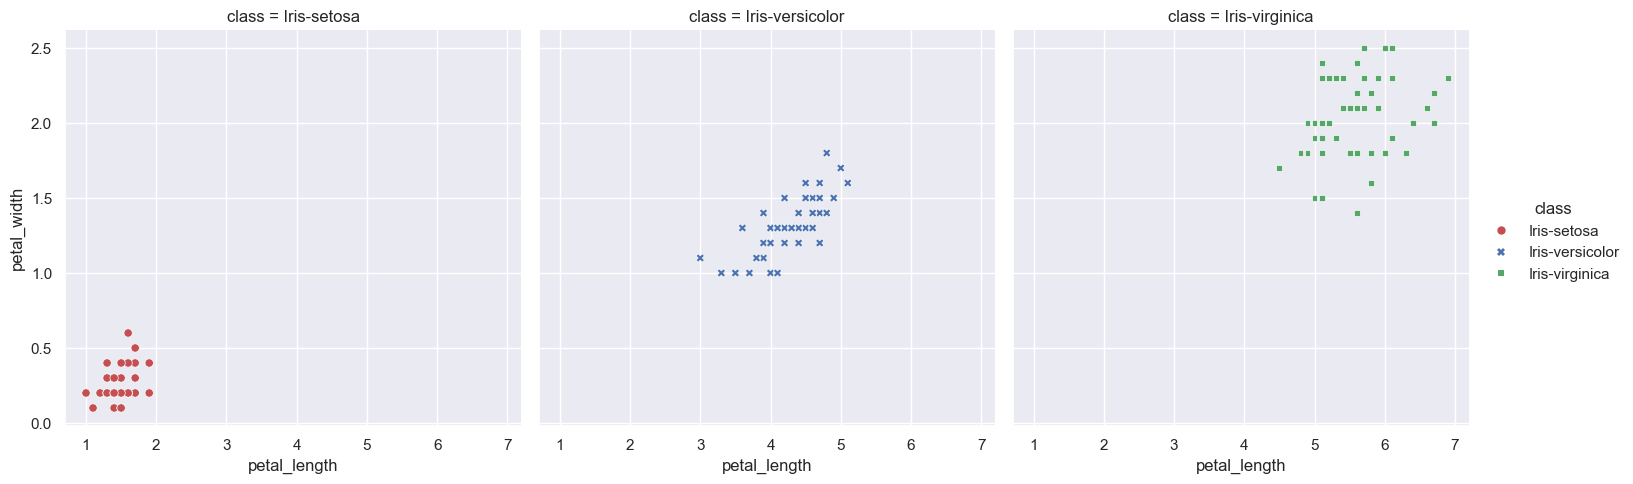

In [14]:
make_scatter_plots(df=iris_df, x="petal_length", y="petal_width", filename=PROJECT_ROOT / 'figures/scatter_petal')

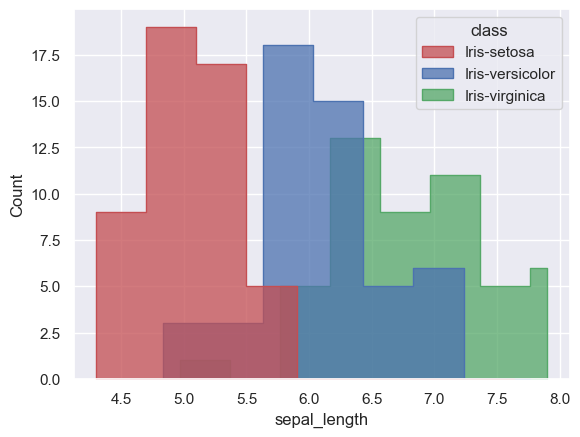

In [22]:
make_histograms(df=iris_df, x="sepal_length", filename=PROJECT_ROOT / 'figures' / 'hist_sepal_length')

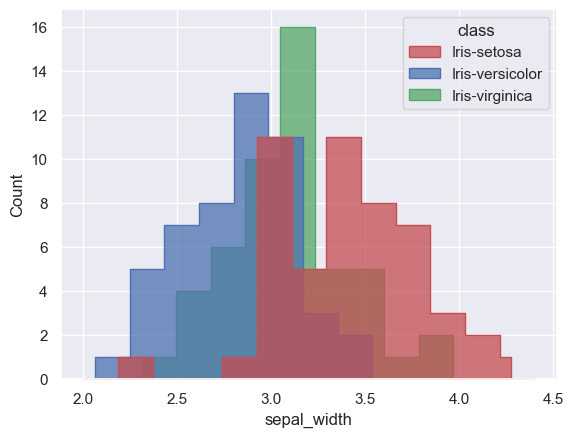

In [23]:
make_histograms(df=iris_df, x="sepal_width", filename=PROJECT_ROOT / 'figures' / 'hist_sepal_width')

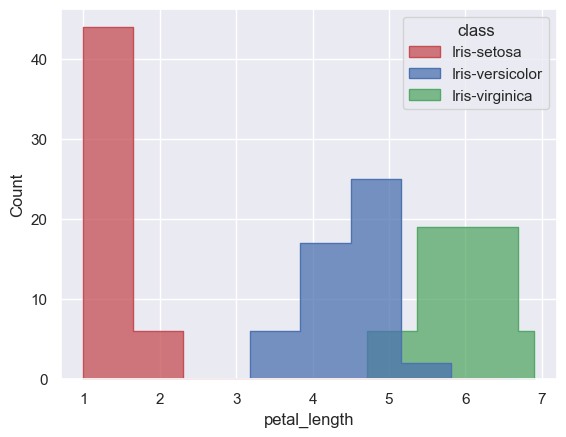

In [24]:
make_histograms(df=iris_df, x="petal_length", filename=PROJECT_ROOT / 'figures' / 'hist_petal_length')

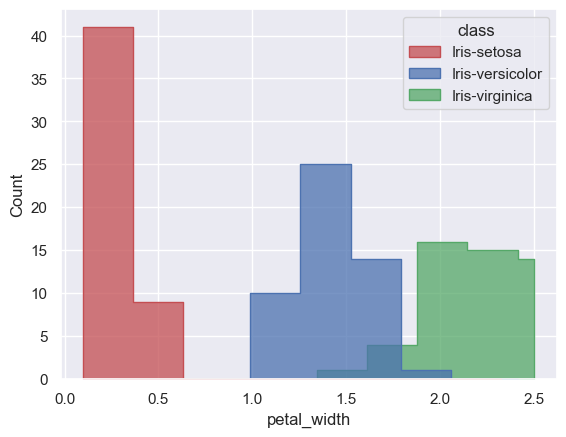

In [25]:
make_histograms(df=iris_df, x="petal_width", filename=PROJECT_ROOT / 'figures' / 'hist_petal_width')

In [26]:
iris_df_combined = iris_df.with_columns(
    (pl.col("sepal_length") + pl.col("sepal_width")).alias("sepal_sum"),
    (pl.col("petal_length") + pl.col("petal_width")).alias("petal_sum"),
).with_columns((pl.col("sepal_sum") + pl.col("petal_sum")).alias("total_sum"))

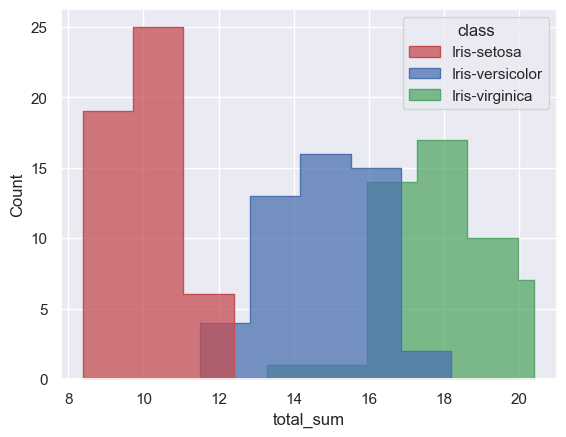

In [27]:
make_histograms(df=iris_df_combined, x="total_sum", filename=PROJECT_ROOT / 'figures' / 'hist_total')

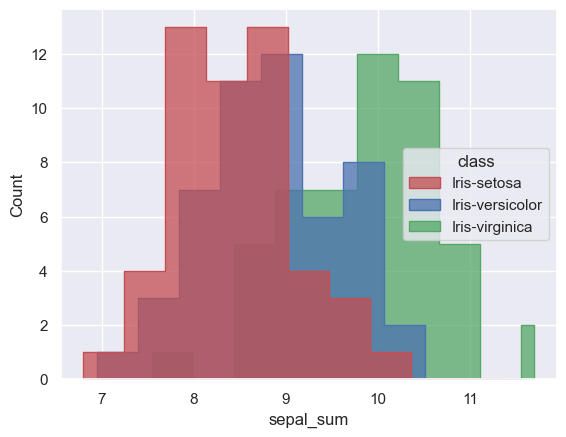

In [29]:
make_histograms(df=iris_df_combined, x="sepal_sum", filename=PROJECT_ROOT / 'figures' / 'hist_sepal_sum')

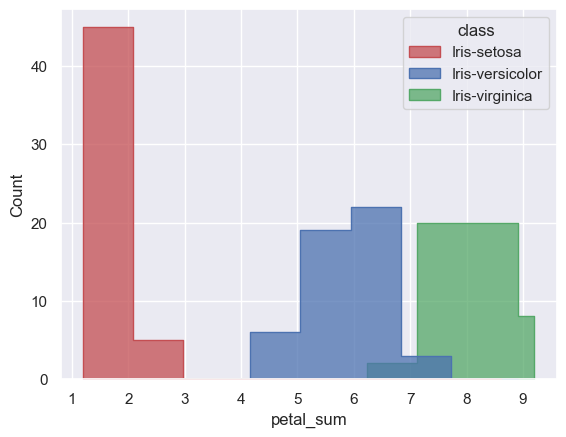

In [30]:
make_histograms(df=iris_df_combined, x="petal_sum", filename=PROJECT_ROOT / 'figures' / 'hist_petal_sum')